# Mod 2 Week 2: Regression on the Boston Housing Dataset

## Introduction

In this lab, we shall apply regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We are going to identify the predictive ability of features found in this dataset towards identifying housing prices. 

### Objectives:
You will be able to:
* Perform statistical tests on our data
* Build linear models with boston housing data set using OLS
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

<img src="https://media.giphy.com/media/3qCAELaZ4oXLKmZlUA/giphy.gif" 
alt="IMAGE ALT TEXT HERE" border="10" />

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [225]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [143]:
boston_housing_df = pd.read_csv("BostonHousing.csv")

### Inspect the first few rows and all the columns of the dataset

In [206]:
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [145]:
boston_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [146]:
boston_housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Observations
 `Of 14 variables, only one is categorical. For every record we have 13 predictors and the target variable (medv). From looking at the numbers, most of the predictor variables have a low variance, but some do have extreme values (crim, zn, lstat) - where these extreme values are more than 3 standard deviations away. In looking at the quartiles, the rest of the variables appear normally distributed, with the 50% cut-off being within one standard deviation of the mean.`

### For this lab, we're going to narrow the data down. Create a new dataset with `['crim', 'indus', 'chas', 'rm', 'tax', 'medv']`

In [147]:
boston_df = boston_housing_df[["chas", "crim", "indus", "rm", "tax", "medv"]].copy()

In [148]:
boston_df.head()

,chas,crim,indus,rm,tax,medv
0,0,0.00632,2.31,6.575,296,24.0
1,0,0.02731,7.07,6.421,242,21.6
2,0,0.02729,7.07,7.185,242,34.7
3,0,0.03237,2.18,6.998,222,33.4
4,0,0.06905,2.18,7.147,222,36.2


### Go to the dataset's documentation on [Kaggle](https://www.kaggle.com/c/boston-housing) and note what these variables mean. 

`- crim: per capita crime rate`

`- indus: percentage of non-retail businesses`

`- chas: whether or not the property is by the river (1 = yes, 0 = no)`

`- rm: average number of rooms`

`- tax: full value property tax rate per 10,000 USD`

`- medv: median value in 1000 USD`

### Optional: Plot a histogram for each variable to visualize their distributions.

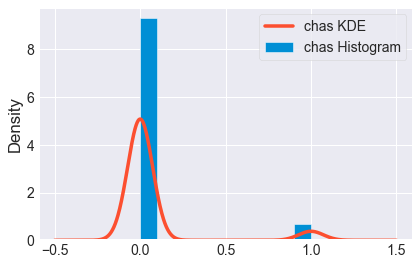

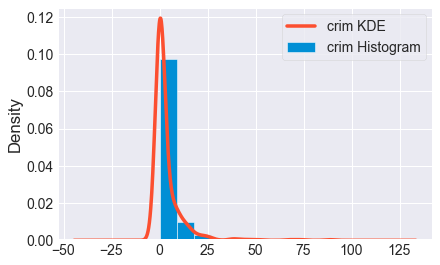

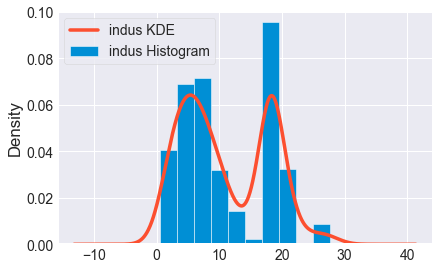

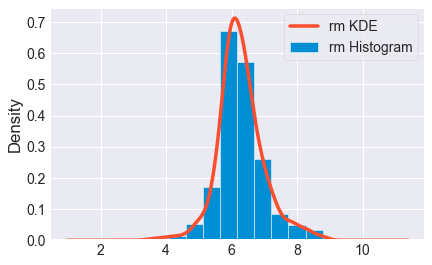

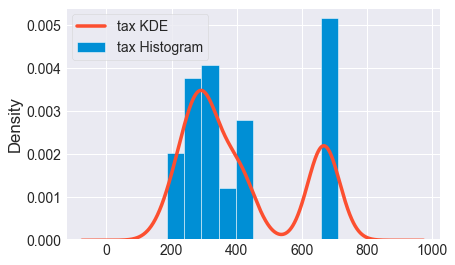

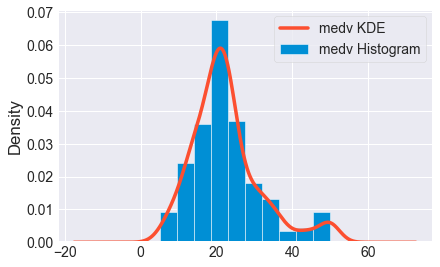

In [149]:
# Plot a histogram with a density plot for each variable in our dataset
for columns in boston_df:
    boston_df[columns].plot.hist(normed = True, label = columns + " Histogram")
    boston_df[columns].plot.kde(label = columns + " KDE", linewidth = 3.5)
    plt.legend()
    plt.show()

### Answer the following questions:

1. The average effective tax rate in Massachusetts is 1.21%. Based on this dataset, is Boston's tax rate significantly more than 1.21%? (alpha = 0.05) Set up your Null and Alternative Hypotheses. In your answer, state the statistical test you're using.


#### `Ho = Boston's tax rate <= 1.21%`


#### `Ha = Boston's tax rate > 1.21%`

In [217]:
taxes = boston_df["tax"] / 10000

In [223]:
x_bar = taxes.mean() # Sample mean
n = taxes.size # Sample size
sigma = taxes.std() # SD of population
mu = 0.0121 # Population mean
z = (x_bar - mu) /(sigma/sqrt(n))

print(f"Sample mean {x_bar}")
print(f"Sample size {n}")
print(f"Standard Deviation {sigma}")
print(f"Population mean {mu}")
print(f"Z-score {z}")

cdf = stats.norm.cdf(z)
p_val = 1 - cdf
print(f"P-value {p_val}")

Sample mean 0.04082371541501987
Sample size 506
Standard Deviation 0.01685371160549589
Population mean 0.0121
Z-score 38.33719337673187
P-value 0.0


In [233]:
np.random.seed()

# Select sample size
sample_size = 50

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(50):
    # Take randome sample of chosen size
    sample = taxes.sample(n = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean) # Calculate sample mean
    
    z_critical = stats.norm.ppf(q = 0.95) # Get critical Z value
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    
    margin_of_error = z_critical * (sigma / sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    intervals.append(confidence_interval)

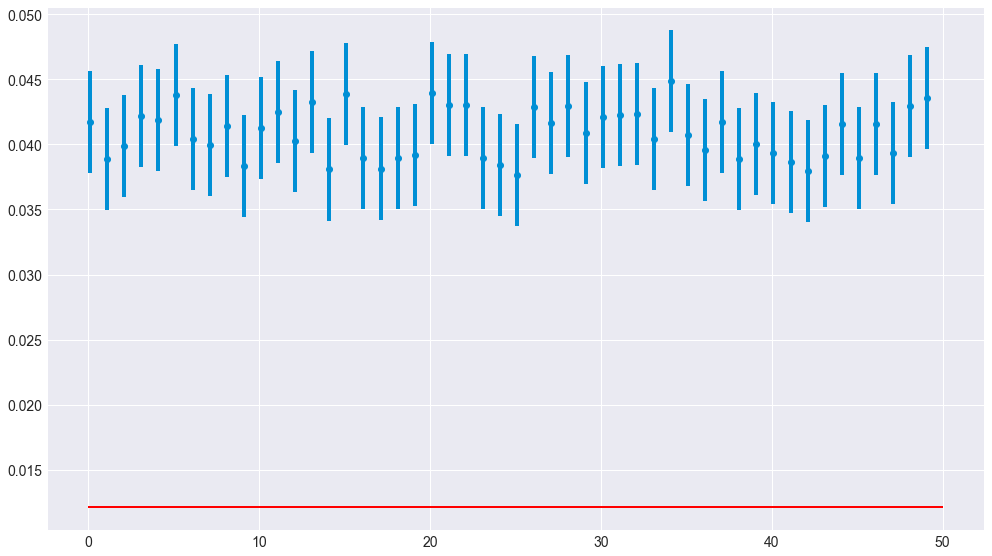

In [243]:
# Plot the mean and confidence interval of each sample as error bars
# Plot the population mean

plt.figure(figsize = (15,9))

plt.errorbar(x = np.arange(0.1, 50, 1), 
             y = sample_means, 
             yerr = [(top-bot) / 2 for top, bot in intervals], 
             fmt = "o")

plt.hlines(xmin = 0, xmax = 50,
           y = 0.0121,
           linewidth = 2.0,
           color = "red")

# Observations

`With a p-value lower than our alpha we can reject the null hypothesis`

2. Assume that the crime rates in our dataset represent the population. What are the population's parameters (mean and standard deviation)? Is the crime rate in nearby Qunicy of **4.07 per 1000 residents** significantly different from Boston's? Again, set up your hypotheses, alpha = 0.05, and state the statistical test you're using.

#### `Ho: Crime rate Quincy = Crime rate Boston`
#### `Ha: Crime rate Quincy != Crime rate Boston`

In [244]:
mu_2 = boston_df["crim"].mean()
sigma_2 = boston_df["crim"].std()
n_2 = boston_df["crim"].size
x_bar_2 = 4.07
z_2 = (x_bar_2 - mu_2) / (sigma_2/ sqrt(n))

print(f"Sample mean {x_bar_2}")
print(f"Sample size {n_2}")
print(f"Standard Deviation {sigma_2}")
print(f"Population mean {mu_2}")
print(f"Z-score {z_2}")

cdf_2 = stats.norm.cdf(z_2)
p_val_2 = 1 - cdf_2
print(f"P-value {p_val_2}")

Sample mean 4.07
Sample size 506
Standard Deviation 8.601545105332487
Population mean 3.6135235573122535
Z-score 1.1937603699491302
P-value 0.11628585894763643


In [261]:
# Alpha
alpha_2 = 0.05/2

np.random.seed()

# Select sample size
sample_size_2 = 100

# Initialize lists to store interval and mean values
intervals_2 = []
sample_means_2 = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(100):
    # Take randome sample of chosen size
    sample = boston_df["crim"].sample(n = sample_size_2)
    sample_mean = sample.mean()
    sample_means_2.append(sample_mean) # Calculate sample mean
    
    z_critical = stats.norm.ppf(q = 1 - alpha_2) # Get critical Z value
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    
    margin_of_error = z_critical * (sigma_2 / sqrt(sample_size_2))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    intervals_2.append(confidence_interval)

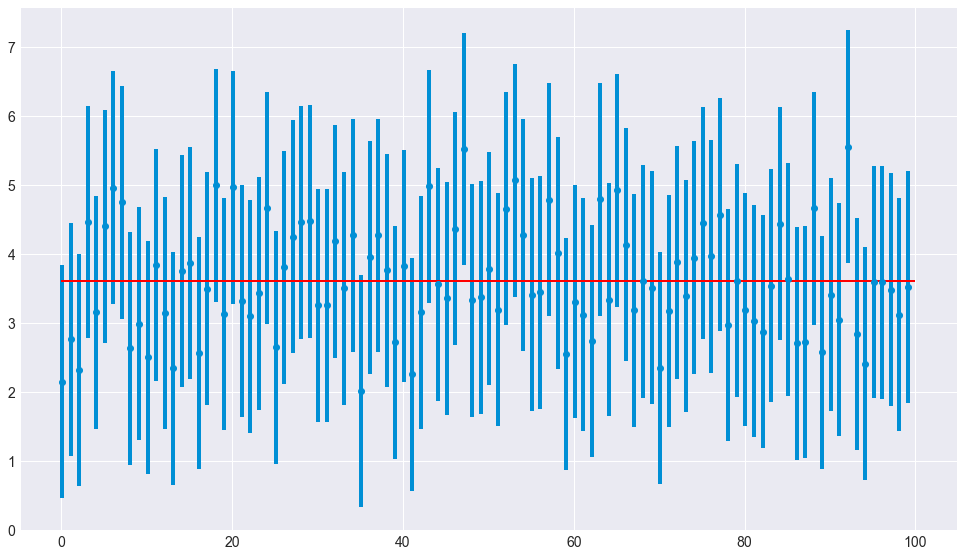

In [263]:
# Plot the mean and confidence interval of each sample as error bars
# Plot the population mean

plt.figure(figsize = (15,9))

plt.errorbar(x = np.arange(0.1, 100, 1), 
             y = sample_means_2, 
             yerr = [(top-bot) / 2 for top, bot in intervals_2], 
             fmt = "o")

plt.hlines(xmin = 0, xmax = 100,
           y = mu_2,
           linewidth = 2.0,
           color = "red")

# Observations

`Given that the p-value is greater than alpha, and as can be seen from the visualization above, we fail to reject the null hypothesis`

3. In this lab, we are going to use **medv** as our target variable. Which of the other variables (a.k.a. *features*) (crim, rm, tax, indus) is most correlated with **medv**? 

For each feature, find the correlation coefficient with **medv** and *(bonus)* make a scatterplot. How would you interpret the correlation between our features and our target?

In [152]:
# Create a copy of the data to perform correlation calculations
data_correlations = boston_df.iloc[:, 1:6]
data_correlations.head()

,crim,indus,rm,tax,medv
0,0.00632,2.31,6.575,296,24.0
1,0.02731,7.07,6.421,242,21.6
2,0.02729,7.07,7.185,242,34.7
3,0.03237,2.18,6.998,222,33.4
4,0.06905,2.18,7.147,222,36.2


In [153]:
# Correlation matrix
data_correlations.corr()

,crim,indus,rm,tax,medv
crim,1.000000,0.406583,-0.219247,0.582764,-0.388305
indus,0.406583,1.000000,-0.391676,0.720760,-0.483725
rm,-0.219247,-0.391676,1.000000,-0.292048,0.695360
tax,0.582764,0.720760,-0.292048,1.000000,-0.468536
medv,-0.388305,-0.483725,0.695360,-0.468536,1.000000


In [154]:
# Create a boolean table were significant correlations are highlighted
abs(data_correlations.corr()) > 0.75

,crim,indus,rm,tax,medv
crim,True,False,False,False,False
indus,False,True,False,False,False
rm,False,False,True,False,False
tax,False,False,False,True,False
medv,False,False,False,False,True


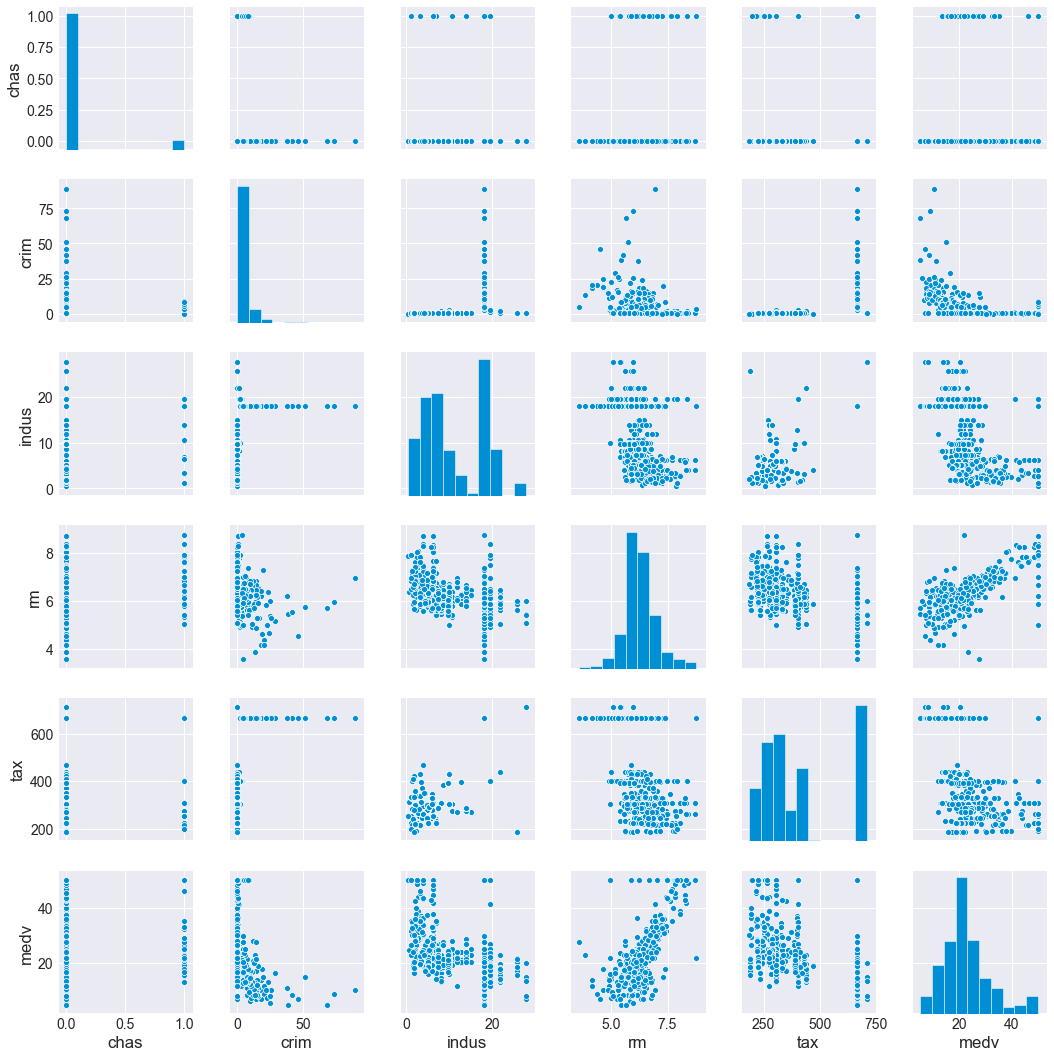

In [155]:
# Use a pairplot visualization to understand the relationships between
# all the variables in the dataset
sns.pairplot(boston_df)
plt.show()

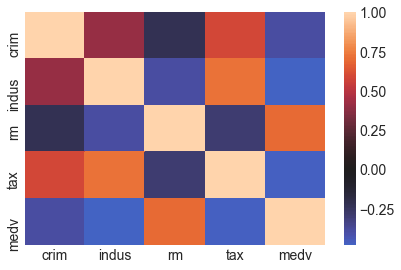

In [156]:
# Use a heatmap to evaluate correlations between the numerical variables
sns.heatmap(data_correlations.corr(), center = 0)

# Observations from correlation calculations & visualizations

`There is no strong correlation (|corr| > 0.75) between **medv and crim, indus, tax, or rm**. The highest correlation found was between number of rooms and medv. In light of these, we are going to perform some data transformation using the Log-Log model to improve on linearity.`

In [157]:
# Create a copy of the dataset to perform data transformations
boston_df_log = boston_housing_df[["crim", "indus", "rm", "tax", "medv"]].copy()

In [158]:
boston_df_log.head()

,crim,indus,rm,tax,medv
0,0.00632,2.31,6.575,296,24.0
1,0.02731,7.07,6.421,242,21.6
2,0.02729,7.07,7.185,242,34.7
3,0.03237,2.18,6.998,222,33.4
4,0.06905,2.18,7.147,222,36.2


In [159]:
# Checking for zero
boston_df_log.any()

crim     True
indus    True
rm       True
tax      True
medv     True
dtype: bool

In [160]:
# Transforming variables with the Log_log Model to improve linearity
boston_df_log = boston_df_log.apply(np.log)

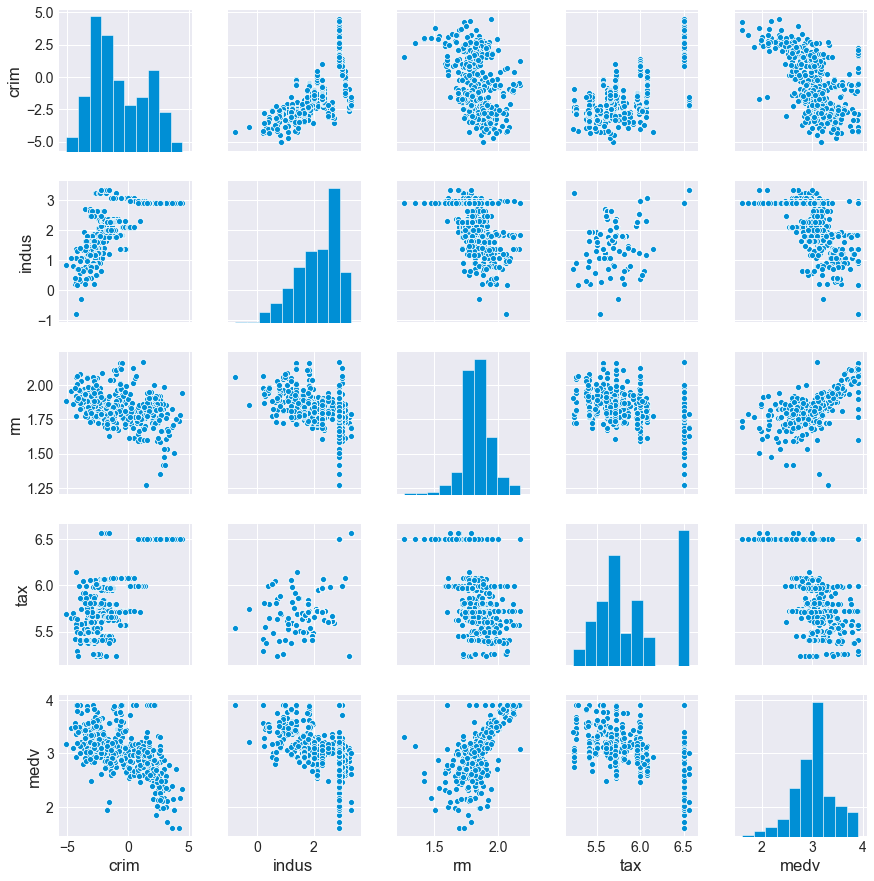

In [161]:
# Plot of logarithmic dataset
sns.pairplot(boston_df_log)
plt.show()

# Observations

`From performing the Log-Log Model transformation, there were no significant improvements in the linearity of the data. For this reason, we'll continue our analysis using the original dataset, not the transformed one.`

![mathdamon](https://media.giphy.com/media/9cpXRPjZuo6pq/giphy.gif "math")

## Let's do our first Regression!

Using StatsModels, run a univariate (single variable) linear regression with **medv** as the target and the most correlated column as the one feature.



In [215]:
# Choose X and Y from the DataFrame
# With a constant

y = boston_df["medv"]
x = boston_df["rm"]
f = "medv~rm"

model = smf.ols(formula = f, data = boston_df).fit()

In [216]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        10:05:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observations

`An R-Squared of **0.484** can be interpreted as 48.4% of variations in **medv** are explained by **rm**.`

`With a **p-value** of 0, it is unlikely this results would be observed if there were no relationship.`

`Even so, the relationship is moderately strong as can be observed by the correlation calculartion, which was 0.69.`



In [214]:
# Choose X and Y from the DataFrame
# Without a constant

y = boston_df["medv"]
x = boston_df["rm"]

model_no_constant = sm.OLS(y, x).fit()
model_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        10:05:02   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

      rm
0  3.561
1  8.780
      rm
0  3.561
1  8.780
0    -2.258011
1    45.245896
dtype: float64
0    13.009581
1    32.076417
dtype: float64


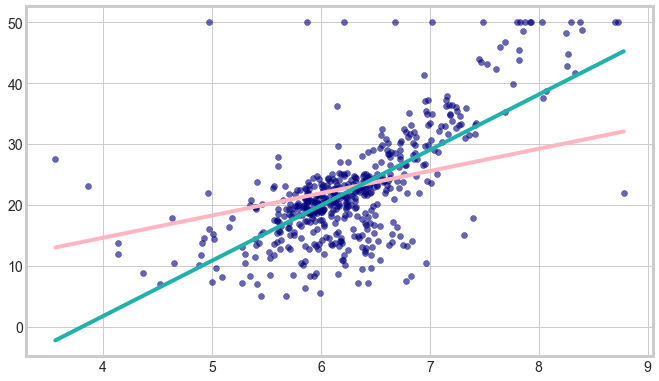

In [283]:
# create a DataFrame with the minimum and maximum values of TV
medv_df_1 = pd.DataFrame({"rm": [boston_df.rm.min(), boston_df.rm.max()]})
medv_df_2 = pd.DataFrame({"rm": [boston_df.rm.min(), boston_df.rm.max()]})
print(medv_df_1.head())
print(medv_df_2.head())
# make predictions for those x values and store them
medv_pred_1 = model.predict(medv_df_1)
medv_pred_2 = model_no_constant.predict(medv_df_2)
print(medv_pred_1)
print(medv_pred_2)

# first, plot the observed data and the least squares line
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
plt.scatter(boston_df["rm"], boston_df["medv"], c = "navy", alpha = 0.6)
plt.plot(medv_df_2["rm"], medv_pred_2, c = "lightpink")
plt.plot(medv_df["rm"], medv_pred_1, c = "lightseagreen")

## Level Up: Multiple Regression!
Now that we've done regression with one feature, let's try it out with multiple features. From our five features, take one out from your model. Justify why you chose to omit that feature.

In [281]:
# DF of four features
X = boston_df[["chas", "crim", "rm", "indus", "medv"]].copy()
f_m = "medv~chas+crim+rm+indus"
multiple_reg_model = smf.ols(formula = f_m, data = X).fit()

# Observations

`The **tax** feature was omitted, as from the scatterplots it has the most convoluted relationship with **medv**`

`The **tax** feature also had a very high correlation with the **indus** feature, so by taking it out we were trying to minimize multicollinearity.`

In [282]:
multiple_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     173.7
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           3.43e-93
Time:                        11:48:21   Log-Likelihood:                -1620.2
No. Observations:                 506   AIC:                             3250.
Df Residuals:                     501   BIC:                             3271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.8629      2.834     -7.362      0.000     -26.431     -15.295
chas           4.5630      1.061      4.300      0.000       2.478       6.648
crim          -0.1887      0.034     -5.542      0.000      -0.256      -0.122
rm             7.4325      0.416     17.888      0.000       6.616       8.249
indus         -0.2648      0.045     -5.820      0.000      -0.354      -0.175
==============================================================================
Omnibus:                      211.501   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1481.256
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      10.691   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do the coefficients make sense?

## Observations

`The coefficients make sense, and are consistent with both the correlation matrix and the relationships observed through the scatterplots`

- `As crime rate per capita goes up, the median value goes down`

- `If the house is closer to the river, the median value is higher`

- `As the number of rooms goes up, so does the median value of the house`

- `As the percentage of non-retail businesses goes down, so does the value of the house`

` The coefficients are statistically significant.`

#### Questions:
1. Between the single and multiple regression models, which did better? What metric do you use to compare?
2. Looking at the coefficients of the multiple regression model, how does **medv** change if the average number of rooms of an area goes up by 1?
3. Neighborhood A has a crime rate of 2%, has houses of 6.5 rooms on average, is subject to a property tax rate of 300 per 10,000 dollars, and has an indus stat of 7. How much would our multiple regression model predict Neighborhood A's **medv** to be?
4. (Bonus) Without using StatsModels, write a function that takes in 4 values as parameters that outputs a prediction for **medv**.

### Question 1

`Using R-Squared as our metric for comparison, we determined that the multiple regression model perform better than the simple regression model. With 58.1% of variations in **medv** explaoined by the 4 independent variables.`

### Question 2

`In this case we look at the slope. The slope represents the change in **y** for every unit of change in **x**, in this case, since the slope is 7.4325, if he number of rooms goes up by 1 the median value would go up by 7,432.5 USD`

In [200]:
# df for your five features
X_other = boston_df[["chas", "crim", "rm", "indus", "tax", "medv"]].copy()
f_m_2 = "medv~chas+crim+rm+indus+tax"
multiple_reg_model_2 = smf.ols(formula = f_m_2, data = X_other).fit()

In [201]:
multiple_reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     143.0
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           5.49e-94
Time:                        22:54:19   Log-Likelihood:                -1615.6
No. Observations:                 506   AIC:                             3243.
Df Residuals:                     500   BIC:                             3269.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3765      2.855     -6.788      0.000     -24.985     -13.768
chas           4.2798      1.057      4.049      0.000       2.203       6.356
crim          -0.1371      0.038     -3.618      0.000      -0.211      -0.063
rm             7.4701      0.412     18.114      0.000       6.660       8.280
indus         -0.1530      0.058     -2.617      0.009      -0.268      -0.038
tax           -0.0077      0.003     -3.011      0.003      -0.013      -0.003
==============================================================================
Omnibus:                      246.183   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2062.483
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      12.097   Cond. No.                     4.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
# Prediction
intercept = -19.3765
chas = 4.2798
crim = -0.1371
rm = 7.4701
indus = -0.1530
tax = -0.0077

prediction = intercept + (1 * chas) + (2 * crim) + (6.5 * rm) + (7 * indus) + (300 * tax)
prediction

29.803750000000004

![mathdamon](https://media.giphy.com/media/7pLv68ItwBaHS/giphy.gif "goodstuff")

## Bonus:

Look up **scikit-learn** to understand the cells below. *sklearn* is the industry standard library for doing ML models. Your task is to add comments to the code to describe what's happening.

![mathdamon](https://media.giphy.com/media/iB5i8ChtOAHba/giphy.gif "goodstuff")

In [174]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [274]:
X_1 = boston_df[["chas", "crim", "rm", "indus", "tax"]].copy()
y = boston_df[["medv"]].copy()

# Ordinary least squared linear regression, where the fit_intercept parameter
# is set to False, meaning no intercept will be calculated for the 
# regression. Basically it sets the y-intercept to 0 and forces
# the line to go through the origin
sklearnmodel = LinearRegression(fit_intercept=False)
# Fit linear model
sklearnmodel.fit(X_1, y)
# Returns coefficient of determination
r_squared = sklearnmodel.score(X_1, y)

# Generate a random regression problem
X_new, y_new = make_regression(n_samples = 10, n_features = 5, n_informative = 4, noise = 0.1, random_state = 1)
# 2D np.array as another input for predict
x_new_2 = np.array([[1, 3.4, 3, 17, 220], [0, 2.1, 3, 10, 275], [1, 7.8, 7, 12, 321], [1, 2, 6.5, 7, 300]])
# You may have to change the order of this based on your X data
predict = sklearnmodel.predict(x_new_2) 


print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [[ 4.90756327 -0.12517343  4.7744538  -0.25476812 -0.01067393]]
R2:  0.5505179696773875
Prediction:  [[12.12601321]
 [ 8.5774863 ]
 [30.86883936]
 [30.70561141]]


![mathdamon](https://media.giphy.com/media/ESuXjz5pKQSGs/giphy.gif "goodstuff")

Are the results from your sklearn model different from your StatsModels model? Note: the R^2 values for both might be different due to the different ways sklearn and sm calculate R^2. Don't worry about it.

# Observations

`The result from ScikitLearn are a little different from the StatsModels, but this difference could be explained by the fact that the ScikitLearn model is not using a constant, and it is forcing the best fit line through the origin`